In [1]:
import pandas as pd
import numpy as np
from numpy import nan
from scipy import stats
import scipy

In [2]:
WEIGHT=pd.read_excel('AntibioticsConcentrationSalmonellaExp.xlsx',sheet_name='Irrigation water')

In [3]:
WEIGHT

,Soil(g),Shoots_Fresh(g),Shoots_Dry(g),Roots_Fresh(g),Roots_Dry(g),Rhizosphere(g),D1(ml),D2(ml),D3(ml),D4(ml),...,D25(ml),D26(ml),D27(ml),D28(ml),D29(ml),D30(ml),D31(ml),D32(ml),D33(ml),D34(ml)
A4,1270.07,4.714657,0.50,4.295487,0.568,13.03,0,0,42.7664,32.0664,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A5,1265.89,7.260571,0.77,5.361797,0.709,15.51,0,0,29.2216,38.2216,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A6,1268.85,4.337484,0.46,3.100616,0.410,11.95,0,0,34.3352,37.0352,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A7,1264.80,8.100000,0.63,4.380000,0.420,14.60,0,0,40.5336,31.4336,...,61.4624,43.2336,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A8,1269.17,5.400000,0.52,4.150000,0.420,10.43,0,0,28.6624,41.1624,...,68.9336,66.0624,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A9,1272.68,9.000000,0.79,2.740000,0.330,5.92,0,0,33.3184,36.3184,...,48.6184,52.2184,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A10,1277.01,10.300000,1.33,4.870000,0.670,6.39,0,0,41.1096,30.8096,...,64.4096,47.0096,59.8096,60.2096,48.8096,58.4096,58.1096,51.1096,65.7096,48.2096
A11,1275.55,10.800000,1.48,5.860000,0.900,5.45,0,0,26.8640,39.3640,...,65.7640,59.2640,72.8640,77.2640,64.4640,77.8640,78.1640,65.7640,84.0640,58.0640
A12,1273.09,8.700000,0.86,4.190000,0.660,6.71,0,0,28.9912,35.0912,...,47.7912,48.9912,59.7912,63.4912,53.7912,64.0912,64.1912,54.9912,68.0912,50.0912
A13,1276.19,5.000000,0.61,3.575000,0.590,6.81,0,0,42.2520,32.8520,...,59.3520,42.4520,51.7520,52.0520,42.8520,51.8520,0.0000,0.0000,0.0000,0.0000


In [4]:
np.mean(WEIGHT.loc[:,'Shoots_Dry(g)'])

0.7775000000000002

In [5]:
#TRI=pd.read_excel('AntibioticsConcentrationSalmonellaExp.xlsx',sheet_name='Tetracycline')
#TRI.head(8)

In [6]:
#TRI[TRI.loc[4,'Shoot(ppb)']]=nan


In [7]:
result = []
name_ = []
data_cal=[]
candidate = ['Sulfamethoxazole','Trimethoprim','Lincomycin','Oxytetracycline','Monensin Sodium','Tylosin','Ciprofloxacin','Cephalexin','Tetracycline']

for name in candidate:
    data = pd.read_excel('AntibioticsConcentrationSalmonellaExp.xlsx',sheet_name=name)
    data[data.loc[:,'Shoot(ppb)':] < 0] = nan
    if name == 'Sulfamethoxazole':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<10]=nan
    if name == 'Trimethoprim':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<4]=nan
        data.loc[3,'Shoot(ppb)']=nan     #one shoot concentration too high
    if name == 'Lincomycin':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<10]=nan
    if name == 'Oxytetracycline':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<10]=nan
    if name == 'Monensin Sodium':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<1]=nan
    if name == 'Tylosin':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<1]=nan
    if name == 'Ciprofloxacin':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<1]=nan
    if name == 'Cefalexin':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<10]=nan
    if name == 'Tetracycline':
        data[data.loc[:,'D3_7water(ppb)':'D31_34water(ppb)']<10]=nan
        data.loc[4,'Shoot(ppb)']=nan #one shoot concentration too high 
        

        
        
    Day25Mass_total_data=(((WEIGHT.loc[:,'D1(ml)':'D7(ml)'].sum(axis=1))*(np.mean(data['D3_7water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D8(ml)':'D9(ml)'].sum(axis=1))*(np.mean(data['D8_9water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D10(ml)':'D14(ml)'].sum(axis=1))*(np.mean(data['D10_14water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D15(ml)':'D16(ml)'].sum(axis=1))*(np.mean(data['D15_16water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D17(ml)':'D20(ml)'].sum(axis=1))*(np.mean(data['D17_20water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D21(ml)':'D22(ml)'].sum(axis=1))*(np.mean(data['D21_22water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D23(ml)':'D24(ml)'].sum(axis=1))*(np.mean(data['D23_27water(ppb)'][19: ,])))/1000)\
                      
    mean_shootbackground = np.mean(data.loc[15:17,'Shoot(ppb)']) #average and remove background control concentration
    if np.isnan(mean_shootbackground):
        mean_shootbackground = 0

    mean_rootbackground = np.mean(data.loc[15:17,'Root(ppb)'])
    if np.isnan(mean_rootbackground):
        mean_rootbackground = 0

    mean_soilbackground = np.mean(data.loc[15:17,'Soil(ppb)'])
    if np.isnan(mean_soilbackground):
        mean_soilbackground = 0

    mean_rhizobackground = np.mean(data.loc[15:17,'Rhizosphere(ppb)'])
    if np.isnan(mean_rhizobackground):
        mean_rhizobackground = 0
    
    Day25Mass_shoot_data=((((data.loc[0:11,'Shoot(ppb)'])-mean_shootbackground)*0.005/0.25)\
                           *np.array((WEIGHT.loc[:,'Shoots_Dry(g)'])))/0.9

    Day25Mass_root_data=(((((data.loc[0:11,'Root(ppb)'])-mean_rootbackground)*0.005/0.25)\
                          *np.array((WEIGHT.loc[:,'Roots_Dry(g)'])))/0.9)

    Day25Mass_soil_data=(((((data.loc[0:11,'Soil(ppb)'])-mean_soilbackground)*0.005/2.5)\
                          *np.array((WEIGHT.loc[:,'Soil(g)'])))/0.9)

    Day25Mass_rhizo_data=(((((data.loc[0:11,'Rhizosphere(ppb)'])-mean_rhizobackground)*0.005/2.5)\
                           *np.array((WEIGHT.loc[:,'Rhizosphere(g)'])))/0.9)

    #concentration(ug/kglettuce)
    Day25Con_shoot_data=Day25Mass_shoot_data*1000/np.array((WEIGHT.loc[:,'Shoots_Dry(g)']))
    Day25Con_root_data=Day25Mass_root_data*1000/np.array((WEIGHT.loc[:,'Roots_Dry(g)']))
    Day25Con_soil_data=Day25Mass_soil_data*1000/np.array((WEIGHT.loc[:,'Soil(g)']))
    Day25Con_rhizo_data=Day25Mass_rhizo_data*1000/np.array((WEIGHT.loc[:,'Rhizosphere(g)']))

    DAY25_data_extraction= pd.DataFrame({'Total_Mass(ug)':Day25Mass_total_data,\
                             'ShootsMass%':np.array(Day25Mass_shoot_data),\
                             'RootsMass%':np.array(Day25Mass_root_data)*100/Day25Mass_total_data,\
                             'SoilMass%':np.array(Day25Mass_soil_data)*100/Day25Mass_total_data,\
                             'RhizosphereMass%':np.array(Day25Mass_rhizo_data)*100/Day25Mass_total_data,\
                                'Shoots_Concentration(ug/kg)':np.array(Day25Con_shoot_data),\
                                       'Roots_Concentration(ug/kg)':np.array(Day25Con_root_data),\
                                       'Soil_Concentration(ug/kg)':np.array(Day25Con_soil_data),\
                                       'Rhizosphere_Concentration(ug/kg)':np.array(Day25Con_rhizo_data)})

    DAY25_data_extraction[DAY25_data_extraction < 0] = nan

    recovery_data=(DAY25_data_extraction.loc[:,'ShootsMass%':'RhizosphereMass%'].sum(axis=1))

    RCFrhizo_data=DAY25_data_extraction.loc[:,'Roots_Concentration(ug/kg)']/DAY25_data_extraction.loc[:,'Rhizosphere_Concentration(ug/kg)']
    RCFbulk_data=DAY25_data_extraction.loc[:,'Roots_Concentration(ug/kg)']/DAY25_data_extraction.loc[:,'Soil_Concentration(ug/kg)']
    TF_data=DAY25_data_extraction.loc[:,'Shoots_Concentration(ug/kg)']/DAY25_data_extraction.loc[:,'Roots_Concentration(ug/kg)']

    Day25_data_cal=pd.DataFrame({'Total_Mass':Day25Mass_total_data,'Recovery%':np.array(recovery_data),'RCFrhizo':np.array(RCFrhizo_data),'RCFbulk':np.array(RCFbulk_data),'TF':np.array(TF_data)})


    D25_data=pd.concat([DAY25_data_extraction,Day25_data_cal], axis=1)
    D25_data=D25_data.loc['A4':'A6',:]
    D25_data


    Day27Mass_total_data=(((WEIGHT.loc[:,'D1(ml)':'D7(ml)'].sum(axis=1))*(np.mean(data['D3_7water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D8(ml)':'D9(ml)'].sum(axis=1))*(np.mean(data['D8_9water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D10(ml)':'D14(ml)'].sum(axis=1))*(np.mean(data['D10_14water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D15(ml)':'D16(ml)'].sum(axis=1))*(np.mean(data['D15_16water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D17(ml)':'D20(ml)'].sum(axis=1))*(np.mean(data['D17_20water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D21(ml)':'D22(ml)'].sum(axis=1))*(np.mean(data['D21_22water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D23(ml)':'D26(ml)'].sum(axis=1))*(np.mean(data['D23_27water(ppb)'][19: ,])))/1000)\


    DAY27_data_extraction= pd.DataFrame({'Total_Mass(ug)':Day25Mass_total_data,\
                             'ShootsMass%':np.array(Day25Mass_shoot_data),\
                             'RootsMass%':np.array(Day25Mass_root_data)*100/Day27Mass_total_data,\
                             'SoilMass%':np.array(Day25Mass_soil_data)*100/Day27Mass_total_data,\
                             'RhizosphereMass%':np.array(Day25Mass_rhizo_data)*100/Day27Mass_total_data,\
                                'Shoots_Concentration(ug/kg)':np.array(Day25Con_shoot_data),\
                                       'Roots_Concentration(ug/kg)':np.array(Day25Con_root_data),\
                                       'Soil_Concentration(ug/kg)':np.array(Day25Con_soil_data),\
                                       'Rhizosphere_Concentration(ug/kg)':np.array(Day25Con_rhizo_data)})



    DAY27_data_extraction[DAY27_data_extraction < 0] = nan
    recovery_data27=(DAY27_data_extraction.loc[:,'ShootsMass%':'RhizosphereMass%'].sum(axis=1))


    Day27_data_cal=pd.DataFrame({'Total_Mass':Day27Mass_total_data,'Recovery%':np.array(recovery_data27),'RCFrhizo':np.array(RCFrhizo_data),'RCFbulk':np.array(RCFbulk_data),'TF':np.array(TF_data)})


    D27_data=pd.concat([DAY27_data_extraction,Day27_data_cal], axis=1)
    D27_data=D27_data.loc['A7':'A9',:]
    D27_data
    #D27_data.mean()


    Day31Mass_total_data=(((WEIGHT.loc[:,'D1(ml)':'D7(ml)'].sum(axis=1))*(np.mean(data['D3_7water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D8(ml)':'D9(ml)'].sum(axis=1))*(np.mean(data['D8_9water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D10(ml)':'D14(ml)'].sum(axis=1))*(np.mean(data['D10_14water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D15(ml)':'D16(ml)'].sum(axis=1))*(np.mean(data['D15_16water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D17(ml)':'D20(ml)'].sum(axis=1))*(np.mean(data['D17_20water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D21(ml)':'D22(ml)'].sum(axis=1))*(np.mean(data['D21_22water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D23(ml)':'D26(ml)'].sum(axis=1))*(np.mean(data['D23_27water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D28(ml)':'D30(ml)'].sum(axis=1))*(np.mean(data['D28_30water(ppb)'][19: ,])))/1000)



    DAY31_data_extraction= pd.DataFrame({'Total_Mass(ug)':Day25Mass_total_data,\
                             'ShootsMass%':np.array(Day25Mass_shoot_data),\
                             'RootsMass%':np.array(Day25Mass_root_data)*100/Day31Mass_total_data,\
                             'SoilMass%':np.array(Day25Mass_soil_data)*100/Day31Mass_total_data,\
                             'RhizosphereMass%':np.array(Day25Mass_rhizo_data)*100/Day31Mass_total_data,\
                                'Shoots_Concentration(ug/kg)':np.array(Day25Con_shoot_data),\
                                       'Roots_Concentration(ug/kg)':np.array(Day25Con_root_data),\
                                       'Soil_Concentration(ug/kg)':np.array(Day25Con_soil_data),\
                                       'Rhizosphere_Concentration(ug/kg)':np.array(Day25Con_rhizo_data)})


    DAY31_data_extraction[DAY31_data_extraction < 0] = nan
    recovery_data31=(DAY31_data_extraction.loc[:,'ShootsMass%':'RhizosphereMass%'].sum(axis=1))


    Day31_data_cal=pd.DataFrame({'Total_Mass':Day31Mass_total_data,'Recovery%':np.array(recovery_data31),'RCFrhizo':np.array(RCFrhizo_data),'RCFbulk':np.array(RCFbulk_data),'TF':np.array(TF_data)})


    D31_data=pd.concat([DAY31_data_extraction,Day31_data_cal], axis=1)
    D31_data=D31_data.loc['A13':'A15',:]
    D31_data



    Day35Mass_total_data=(((WEIGHT.loc[:,'D1(ml)':'D7(ml)'].sum(axis=1))*(np.mean(data['D3_7water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D8(ml)':'D9(ml)'].sum(axis=1))*(np.mean(data['D8_9water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D10(ml)':'D14(ml)'].sum(axis=1))*(np.mean(data['D10_14water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D15(ml)':'D16(ml)'].sum(axis=1))*(np.mean(data['D15_16water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D17(ml)':'D20(ml)'].sum(axis=1))*(np.mean(data['D17_20water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D21(ml)':'D22(ml)'].sum(axis=1))*(np.mean(data['D21_22water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D23(ml)':'D26(ml)'].sum(axis=1))*(np.mean(data['D23_27water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D28(ml)':'D30(ml)'].sum(axis=1))*(np.mean(data['D28_30water(ppb)'][19: ,])))/1000)\
    +(((WEIGHT.loc[:,'D31(ml)':'D34(ml)'].sum(axis=1))*(np.mean(data['D31_34water(ppb)'][19: ,])))/1000)


    DAY35_data_extraction= pd.DataFrame({'Total_Mass(ug)':Day25Mass_total_data,\
                             'ShootsMass%':np.array(Day25Mass_shoot_data),\
                             'RootsMass%':np.array(Day25Mass_root_data)*100/Day35Mass_total_data,\
                             'SoilMass%':np.array(Day25Mass_soil_data)*100/Day35Mass_total_data,\
                             'RhizosphereMass%':np.array(Day25Mass_rhizo_data)*100/Day35Mass_total_data,\
                                'Shoots_Concentration(ug/kg)':np.array(Day25Con_shoot_data),\
                                       'Roots_Concentration(ug/kg)':np.array(Day25Con_root_data),\
                                       'Soil_Concentration(ug/kg)':np.array(Day25Con_soil_data),\
                                       'Rhizosphere_Concentration(ug/kg)':np.array(Day25Con_rhizo_data)})

    DAY35_data_extraction[DAY35_data_extraction < 0] = nan
    recovery_data35=(DAY35_data_extraction.loc[:,'ShootsMass%':'RhizosphereMass%'].sum(axis=1))

    Day35_data_cal=pd.DataFrame({'Total_Mass':Day31Mass_total_data,'Recovery%':np.array(recovery_data35),\
                                 'RCFrhizo':np.array(RCFrhizo_data),'RCFbulk':np.array(RCFbulk_data),\
                                 'TF':np.array(TF_data)})


    D35_data=pd.concat([DAY35_data_extraction,Day35_data_cal], axis=1)
    D35_data=D35_data.loc['A10':'A12',:]
    D35_data


    D35_data['Harvest_date']='Day35'
    D31_data['Harvest_date']='Day31'
    D27_data['Harvest_date']='Day27'
    D25_data['Harvest_date']='Day25'
    
    D25_data['name'] = name
    D27_data['name'] = name
    D31_data['name'] = name
    D35_data['name'] = name
    #result.append([D25_data,D27_data,D31_data,D35_data])
    if name == 'Sulfamethoxazole':
        data_cal=pd.concat([D25_data,D27_data,D31_data,D35_data])
    else:
        data_cal=pd.concat([data_cal,D25_data,D27_data,D31_data,D35_data])

    

In [8]:
data_cal.to_csv('Antibiotics_Calculated_Summary.csv',sep='\t')
data_cal.round(3).to_csv('Antibiotics_Calculated_Summary_Round.csv',sep='\t')

In [9]:
max(data_cal.loc[:,'RCFbulk'])

911.9954889538494

In [10]:
RCFandTFs=data_cal.loc[:,'Shoots_Concentration(ug/kg)':'name']

In [11]:
RCFandTFs

,Shoots_Concentration(ug/kg),Roots_Concentration(ug/kg),Soil_Concentration(ug/kg),Rhizosphere_Concentration(ug/kg),Total_Mass,Recovery%,RCFrhizo,RCFbulk,TF,Harvest_date,name
A4,NaN,20.346198,1.349851,0.913162,28.767225,6.041112,22.281049,15.072923,NaN,Day25,Sulfamethoxazole
A5,NaN,23.819953,0.717602,0.733743,26.951303,3.475432,32.463600,33.193813,NaN,Day25,Sulfamethoxazole
A6,6.976797,22.485403,0.911228,0.686326,29.138549,4.030976,32.761998,24.675926,0.310281,Day25,Sulfamethoxazole
A7,NaN,7.236206,0.628034,2.014020,30.568995,2.704639,3.592916,11.522003,NaN,Day27,Sulfamethoxazole
A8,NaN,15.086500,2.256074,3.563424,36.163330,8.038099,4.233709,6.687060,NaN,Day27,Sulfamethoxazole
A9,4.565461,4.390474,0.859858,4.199077,29.976930,3.741920,1.045581,5.106044,1.039856,Day27,Sulfamethoxazole
A13,NaN,11.789377,1.054801,3.959426,34.949083,3.948735,2.977547,11.176868,NaN,Day31,Sulfamethoxazole
A14,NaN,7.805352,1.801645,5.652364,33.918237,6.872518,1.380900,4.332347,NaN,Day31,Sulfamethoxazole
A15,3.311567,14.085588,1.972879,6.980059,34.968389,7.306117,2.017975,7.139610,0.235103,Day31,Sulfamethoxazole
A10,NaN,11.691248,1.821403,6.298270,35.407477,6.054159,1.856263,6.418815,NaN,Day35,Sulfamethoxazole


In [12]:
### added Nov11

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
RCFcompare=RCFandTFs.loc[:,'RCFrhizo':'RCFbulk']

In [14]:
#t_test_rcf=[]
#for i in range(0,len(RCFcompare['RCFrhizo']),12):
    #t_test_rcf.append(np.nanmean([RCFandTFs['RCFrhizo'][i],RCFandTFs['RCFrhizo'][i+1],RCFandTFs['RCFrhizo'][i+2],RCFandTFs['RCFrhizo'][i+3],RCFandTFs['RCFrhizo'][i+4],RCFandTFs['RCFrhizo'][i+5],RCFandTFs['RCFrhizo'][i+6],RCFandTFs['RCFrhizo'][i+7],RCFandTFs['RCFrhizo'][i+8],RCFandTFs['RCFrhizo'][i+9],RCFandTFs['RCFrhizo'][i+10],RCFandTFs['RCFrhizo'][i+11]]))
    #std_rhizo_anti.append(np.nanstd([RCFandTFs['RCFrhizo'][i],RCFandTFs['RCFrhizo'][i+1],RCFandTFs['RCFrhizo'][i+2],RCFandTFs['RCFrhizo'][i+3],RCFandTFs['RCFrhizo'][i+4],RCFandTFs['RCFrhizo'][i+5],RCFandTFs['RCFrhizo'][i+6],RCFandTFs['RCFrhizo'][i+7],RCFandTFs['RCFrhizo'][i+8],RCFandTFs['RCFrhizo'][i+9],RCFandTFs['RCFrhizo'][i+10],RCFandTFs['RCFrhizo'][i+11]]))
    #name_anti.append(RCFandTFs['name'][i])
    #HarvestDate_anti.append(RCFandTFs['Harvest_date'][i])

In [55]:
#RCFcompare[15:24]
#RCFcompare[27:36]
#RCFcompare[39:48]
#RCFcompare[51:60]
#RCFcompare[63:72]
#RCFcompare[75:84]
RCFcompare[99:108]

,RCFrhizo,RCFbulk
A7,NaN,911.995489
A8,151.741652,432.463363
A9,9.052578,315.720573
A13,13.642230,268.235393
A14,5.011811,86.080687
A15,26.580451,52.290448
A10,12.340144,430.930581
A11,15.076148,135.013739
A12,13.474682,71.119734


No handles with labels found to put in legend.


RCFrhizo v.s. RCFbulk: t-test independent samples, P_val=1.514e-02 stat=-2.742e+00


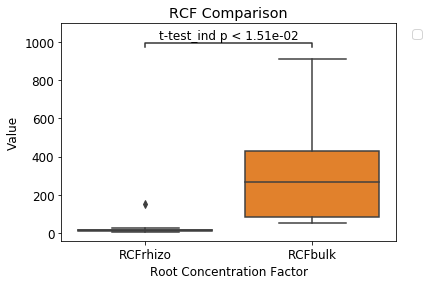

In [56]:
SUL=RCFcompare[99:108]
#0:12; 
RCFCompareplot=sns.boxplot(data=SUL)
add_stat_annotation(RCFCompareplot, data=SUL, 
                    boxPairList=[("RCFrhizo", "RCFbulk")],
                    test='t-test_ind', textFormat='full', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=0)
plt.title('RCF Comparison')
plt.xlabel('Root Concentration Factor')
plt.ylabel('Value')
plt.rcParams.update({'font.size': 12})

In [17]:
#SUL=data_cal.iloc[0:2,'Shoots_Concentration(ug/kg)':'name']
#SUL
#'Sulfamethoxazole'

In [18]:
#added Nov11


No handles with labels found to put in legend.


RCFrhizo v.s. RCFbulk: t-test independent samples, P_val=2.236e-04 stat=-3.771e+00


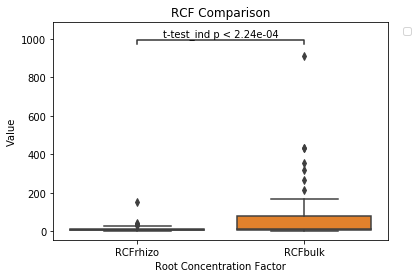

In [19]:
RCFandTFs
#### Do a statistical test between RCF rhizo/RCF bulk
#TF how it differs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

#RCFRHIZOTEST=RCFandTFs.loc[:,'RCFrhizo']
#RCFBULK=RCFandTFs.loc[:,'RCFbulk']

RCFcompare=RCFandTFs.loc[:,'RCFrhizo':'RCFbulk']
#RCFandTFs.boxplot(RCFandTFs.loc[:,'RCFrhizo'],RCFandTFs.loc[:,'RCFbulk'])
#plt.plot(RCFRHIZOTEST,RCFBULK)
RCFCompareplot=sns.boxplot(data=RCFcompare)
add_stat_annotation(RCFCompareplot, data=RCFcompare, 
                    boxPairList=[("RCFrhizo", "RCFbulk")],
                    test='t-test_ind', textFormat='full', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=0)
plt.title('RCF Comparison')
plt.xlabel('Root Concentration Factor')
plt.ylabel('Value')
plt.rcParams.update({'font.size': 12})
#matplotlib.rcParams['font.sans-serif'] = "Arial"
plt.savefig('RCFCOMPARE.png', dpi=400)


#ttest_ind(RCFRHIZOTEST, RCFBULK,nan_policy='omit')


In [20]:
RCFandTFs.loc[:,'RCFrhizo':'RCFbulk'].iloc[0:3,]

,RCFrhizo,RCFbulk
A4,22.281049,15.072923
A5,32.463600,33.193813
A6,32.761998,24.675926


In [21]:
RCFandTFs['RCFrhizo'].iloc[0:3,]=nan #SULoutlier
RCFandTFs['RCFbulk'].iloc[0:3,]=nan #SULoutlier
RCFandTFs

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Shoots_Concentration(ug/kg),Roots_Concentration(ug/kg),Soil_Concentration(ug/kg),Rhizosphere_Concentration(ug/kg),Total_Mass,Recovery%,RCFrhizo,RCFbulk,TF,Harvest_date,name
A4,NaN,20.346198,1.349851,0.913162,28.767225,6.041112,NaN,NaN,NaN,Day25,Sulfamethoxazole
A5,NaN,23.819953,0.717602,0.733743,26.951303,3.475432,NaN,NaN,NaN,Day25,Sulfamethoxazole
A6,6.976797,22.485403,0.911228,0.686326,29.138549,4.030976,NaN,NaN,0.310281,Day25,Sulfamethoxazole
A7,NaN,7.236206,0.628034,2.014020,30.568995,2.704639,3.592916,11.522003,NaN,Day27,Sulfamethoxazole
A8,NaN,15.086500,2.256074,3.563424,36.163330,8.038099,4.233709,6.687060,NaN,Day27,Sulfamethoxazole
A9,4.565461,4.390474,0.859858,4.199077,29.976930,3.741920,1.045581,5.106044,1.039856,Day27,Sulfamethoxazole
A13,NaN,11.789377,1.054801,3.959426,34.949083,3.948735,2.977547,11.176868,NaN,Day31,Sulfamethoxazole
A14,NaN,7.805352,1.801645,5.652364,33.918237,6.872518,1.380900,4.332347,NaN,Day31,Sulfamethoxazole
A15,3.311567,14.085588,1.972879,6.980059,34.968389,7.306117,2.017975,7.139610,0.235103,Day31,Sulfamethoxazole
A10,NaN,11.691248,1.821403,6.298270,35.407477,6.054159,1.856263,6.418815,NaN,Day35,Sulfamethoxazole


In [22]:
mean_rhizo = []
std_rhizo = []
name_ = []
HarvestDate_=[]
for i in range(0,len(RCFandTFs['RCFrhizo']),3):
    mean_rhizo.append(np.nanmean([RCFandTFs['RCFrhizo'][i],RCFandTFs['RCFrhizo'][i+1],RCFandTFs['RCFrhizo'][i+2]]))
    std_rhizo.append(np.nanstd([RCFandTFs['RCFrhizo'][i],RCFandTFs['RCFrhizo'][i+1],RCFandTFs['RCFrhizo'][i+2]]))
    name_.append(RCFandTFs['name'][i])
    HarvestDate_.append(RCFandTFs['Harvest_date'][i])

rhizo_RCF=[]
for i in range(len(mean_rhizo)):
    #print(mean_rhizo[i].round(2),u"\u00B1",std_rhizo[i].round(2))
    mean_rhizo[i]=mean_rhizo[i].round(2)
    std_rhizo[i]=std_rhizo[i].round(2)
    s = str(mean_rhizo[i])+u"\u00B1"+str(std_rhizo[i])
    rhizo_RCF.append(s) 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [23]:
mean_bulk = []
std_bulk = []
name_ = []
HarvestDate_=[]
for i in range(0,len(RCFandTFs['RCFbulk']),3):
    mean_bulk.append(np.nanmean([RCFandTFs['RCFbulk'][i],RCFandTFs['RCFbulk'][i+1],RCFandTFs['RCFbulk'][i+2]]))
    std_bulk.append(np.nanstd([RCFandTFs['RCFbulk'][i],RCFandTFs['RCFbulk'][i+1],RCFandTFs['RCFbulk'][i+2]]))
    name_.append(RCFandTFs['name'][i])
    HarvestDate_.append(RCFandTFs['Harvest_date'][i])

bulk_RCF=[]
for i in range(len(mean_bulk)):
    #print(mean_rhizo[i].round(2),u"\u00B1",std_rhizo[i].round(2))
    mean_bulk[i]=mean_bulk[i].round(2)
    std_bulk[i]=std_bulk[i].round(2)
    s = str(mean_bulk[i])+u"\u00B1"+str(std_bulk[i])
    bulk_RCF.append(s) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [24]:
mean_TF = []
std_TF = []
name_ = []
HarvestDate_=[]
for i in range(0,len(RCFandTFs['TF']),3):
    mean_TF.append(np.nanmean([RCFandTFs['TF'][i],RCFandTFs['TF'][i+1],RCFandTFs['TF'][i+2]]))
    std_TF.append(np.nanstd([RCFandTFs['TF'][i],RCFandTFs['TF'][i+1],RCFandTFs['TF'][i+2]]))
    name_.append(RCFandTFs['name'][i])
    HarvestDate_.append(RCFandTFs['Harvest_date'][i])

TF_RCF=[]
for i in range(len(mean_TF)):
    #print(mean_rhizo[i].round(2),u"\u00B1",std_rhizo[i].round(2))
    mean_TF[i]=mean_TF[i].round(2)
    std_TF[i]=std_TF[i].round(2)
    s = str(mean_TF[i])+u"\u00B1"+str(std_TF[i])
    TF_RCF.append(s) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [25]:
mean_shootcon = []
std_shootcon = []
name_ = []
HarvestDate_=[]
for i in range(0,len(RCFandTFs['Shoots_Concentration(ug/kg)']),3):
    mean_shootcon.append(np.nanmean([RCFandTFs['Shoots_Concentration(ug/kg)'][i],RCFandTFs['Shoots_Concentration(ug/kg)'][i+1],RCFandTFs['Shoots_Concentration(ug/kg)'][i+2]]))
    std_shootcon.append(np.nanstd([RCFandTFs['Shoots_Concentration(ug/kg)'][i],RCFandTFs['Shoots_Concentration(ug/kg)'][i+1],RCFandTFs['Shoots_Concentration(ug/kg)'][i+2]]))
    name_.append(RCFandTFs['name'][i])
    HarvestDate_.append(RCFandTFs['Harvest_date'][i])

shootcon_RCF=[]
for i in range(len(mean_shootcon)):
    #print(mean_rhizo[i].round(2),u"\u00B1",std_rhizo[i].round(2))
    mean_shootcon[i]=mean_shootcon[i].round(2)
    std_shootcon[i]=std_shootcon[i].round(2)
    s = str(mean_shootcon[i])+u"\u00B1"+str(std_shootcon[i])
    shootcon_RCF.append(s) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [26]:
#np.nanmean([float('nan'),float('nan'),float('nan')])

In [27]:
RCFandTFsdataframe= pd.DataFrame({'Rhizosphere Soil RCF':rhizo_RCF,'Bulk Soil RCF':bulk_RCF,'Tranlocation Factor':TF_RCF,\
                                  'Shoots concentration (ug/kg)':shootcon_RCF,'Harvest Date':HarvestDate_,'Antibiotics':name_})
RCFandTFsdataframe.to_csv('RCFandTFsdataframe.csv',sep='\t')


In [28]:
RCFandTFsdataframe

,Rhizosphere Soil RCF,Bulk Soil RCF,Tranlocation Factor,Shoots concentration (ug/kg),Harvest Date,Antibiotics
0,nan±nan,nan±nan,0.31±0.0,6.98±0.0,Day25,Sulfamethoxazole
1,2.96±1.38,7.77±2.73,1.04±0.0,4.57±0.0,Day27,Sulfamethoxazole
2,2.13±0.66,7.55±2.81,0.24±0.0,3.31±0.0,Day31,Sulfamethoxazole
3,1.67±0.21,5.74±0.62,nan±nan,nan±nan,Day35,Sulfamethoxazole
4,5.94±0.35,6.98±0.27,0.07±0.03,6.57±2.12,Day25,Trimethoprim
5,9.59±2.96,10.33±3.58,0.03±0.0,4.56±0.96,Day27,Trimethoprim
6,12.24±2.14,10.15±1.45,0.04±0.01,6.71±3.3,Day31,Trimethoprim
7,13.65±1.9,10.91±1.6,0.04±0.01,9.43±3.43,Day35,Trimethoprim
8,3.36±0.54,4.55±0.43,0.88±0.1,8.24±1.54,Day25,Lincomycin
9,1.12±0.64,2.39±1.58,1.09±0.49,5.41±0.69,Day27,Lincomycin


## Summary according to antibiotics (avearge 4 days)

In [29]:
mean_rhizo_anti = []
std_rhizo_anti = []
name_anti = []
HarvestDate_anti=[]
for i in range(0,len(RCFandTFs['RCFrhizo']),12):
    mean_rhizo_anti.append(np.nanmean([RCFandTFs['RCFrhizo'][i+3],RCFandTFs['RCFrhizo'][i+4],RCFandTFs['RCFrhizo'][i+5],RCFandTFs['RCFrhizo'][i+6],RCFandTFs['RCFrhizo'][i+7],RCFandTFs['RCFrhizo'][i+8],RCFandTFs['RCFrhizo'][i+9],RCFandTFs['RCFrhizo'][i+10],RCFandTFs['RCFrhizo'][i+11]]))
    std_rhizo_anti.append(np.nanstd([RCFandTFs['RCFrhizo'][i+3],RCFandTFs['RCFrhizo'][i+4],RCFandTFs['RCFrhizo'][i+5],RCFandTFs['RCFrhizo'][i+6],RCFandTFs['RCFrhizo'][i+7],RCFandTFs['RCFrhizo'][i+8],RCFandTFs['RCFrhizo'][i+9],RCFandTFs['RCFrhizo'][i+10],RCFandTFs['RCFrhizo'][i+11]]))
    name_anti.append(RCFandTFs['name'][i])
    HarvestDate_anti.append(RCFandTFs['Harvest_date'][i])

rhizo_RCF_anti=[]
for i in range(len(mean_rhizo_anti)):
    #print(mean_rhizo[i].round(2),u"\u00B1",std_rhizo[i].round(2))
    mean_rhizo_anti[i]=mean_rhizo_anti[i].round(2)
    std_rhizo_anti[i]=std_rhizo_anti[i].round(2)
    s = str(mean_rhizo_anti[i])+u"\u00B1"+str(std_rhizo_anti[i])
    rhizo_RCF_anti.append(s) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [30]:
mean_rhizo_anti

[2.25, 11.83, 0.98, 10.68, 17.74, 3.96, 10.46, nan, 30.86]

In [31]:
max(RCFandTFs['RCFrhizo'])

nan

In [32]:
mean_bulk_anti = []
std_bulk_anti = []
name_anti = []
HarvestDate_anti=[]
for i in range(0,len(RCFandTFs['RCFbulk']),12):
    mean_bulk_anti.append(np.nanmean([RCFandTFs['RCFbulk'][i+3],RCFandTFs['RCFbulk'][i+4],RCFandTFs['RCFbulk'][i+5],RCFandTFs['RCFbulk'][i+6],RCFandTFs['RCFbulk'][i+7],RCFandTFs['RCFbulk'][i+8],RCFandTFs['RCFbulk'][i+9],RCFandTFs['RCFbulk'][i+10],RCFandTFs['RCFbulk'][i+11]]))
    std_bulk_anti.append(np.nanstd([RCFandTFs['RCFbulk'][i+3],RCFandTFs['RCFbulk'][i+4],RCFandTFs['RCFbulk'][i+5],RCFandTFs['RCFbulk'][i+6],RCFandTFs['RCFbulk'][i+7],RCFandTFs['RCFbulk'][i+8],RCFandTFs['RCFbulk'][i+9],RCFandTFs['RCFbulk'][i+10],RCFandTFs['RCFbulk'][i+11]]))
    name_anti.append(RCFandTFs['name'][i])
    HarvestDate_anti.append(RCFandTFs['Harvest_date'][i])

bulk_RCF_anti=[]
for i in range(len(mean_bulk_anti)):
    #print(mean_bulk[i].round(2),u"\u00B1",std_bulk[i].round(2))
    mean_bulk_anti[i]=mean_bulk_anti[i].round(2)
    std_bulk_anti[i]=std_bulk_anti[i].round(2)
    s = str(mean_bulk_anti[i])+u"\u00B1"+str(std_bulk_anti[i])
    bulk_RCF_anti.append(s) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [33]:
mean_TF_anti = []
std_TF_anti = []
name_anti = []
HarvestDate_anti=[]
for i in range(0,len(RCFandTFs['TF']),12):
    mean_TF_anti.append(np.nanmean([RCFandTFs['TF'][i+3],RCFandTFs['TF'][i+4],RCFandTFs['TF'][i+5],RCFandTFs['TF'][i+6],RCFandTFs['TF'][i+7],RCFandTFs['TF'][i+8],RCFandTFs['TF'][i+9],RCFandTFs['TF'][i+10],RCFandTFs['TF'][i+11]]))
    std_TF_anti.append(np.nanstd([RCFandTFs['TF'][i+3],RCFandTFs['TF'][i+4],RCFandTFs['TF'][i+5],RCFandTFs['TF'][i+6],RCFandTFs['TF'][i+7],RCFandTFs['TF'][i+8],RCFandTFs['TF'][i+9],RCFandTFs['TF'][i+10],RCFandTFs['TF'][i+11]]))
    name_anti.append(RCFandTFs['name'][i])
    HarvestDate_anti.append(RCFandTFs['Harvest_date'][i])

TF_RCF_anti=[]
for i in range(len(mean_TF_anti)):
    #print(mean_TF[i].round(2),u"\u00B1",std_TF[i].round(2))
    mean_TF_anti[i]=mean_TF_anti[i].round(2)
    std_TF_anti[i]=std_TF_anti[i].round(2)
    s = str(mean_TF_anti[i])+u"\u00B1"+str(std_TF_anti[i])
    TF_RCF_anti.append(s) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [34]:
mean_shootcon_anti = []
std_shootcon_anti = []
name_anti = []
HarvestDate_anti=[]
for i in range(0,len(RCFandTFs['Shoots_Concentration(ug/kg)']),12):
    mean_shootcon_anti.append(np.nanmean([RCFandTFs['Shoots_Concentration(ug/kg)'][i],RCFandTFs['Shoots_Concentration(ug/kg)'][i+1],RCFandTFs['Shoots_Concentration(ug/kg)'][i+2],RCFandTFs['Shoots_Concentration(ug/kg)'][i+3],RCFandTFs['Shoots_Concentration(ug/kg)'][i+4],RCFandTFs['Shoots_Concentration(ug/kg)'][i+5],RCFandTFs['Shoots_Concentration(ug/kg)'][i+6],RCFandTFs['Shoots_Concentration(ug/kg)'][i+7],RCFandTFs['Shoots_Concentration(ug/kg)'][i+8],RCFandTFs['Shoots_Concentration(ug/kg)'][i+9],RCFandTFs['Shoots_Concentration(ug/kg)'][i+10],RCFandTFs['Shoots_Concentration(ug/kg)'][i+11]]))
    std_shootcon_anti.append(np.nanstd([RCFandTFs['Shoots_Concentration(ug/kg)'][i],RCFandTFs['Shoots_Concentration(ug/kg)'][i+1],RCFandTFs['Shoots_Concentration(ug/kg)'][i+2],RCFandTFs['Shoots_Concentration(ug/kg)'][i+3],RCFandTFs['Shoots_Concentration(ug/kg)'][i+4],RCFandTFs['Shoots_Concentration(ug/kg)'][i+5],RCFandTFs['Shoots_Concentration(ug/kg)'][i+6],RCFandTFs['Shoots_Concentration(ug/kg)'][i+7],RCFandTFs['Shoots_Concentration(ug/kg)'][i+8],RCFandTFs['Shoots_Concentration(ug/kg)'][i+9],RCFandTFs['Shoots_Concentration(ug/kg)'][i+10],RCFandTFs['Shoots_Concentration(ug/kg)'][i+11]]))
    name_anti.append(RCFandTFs['name'][i])
    HarvestDate_anti.append(RCFandTFs['Harvest_date'][i])

shootcon_anti=[]
for i in range(len(mean_shootcon_anti)):
    #print(mean_TF[i].round(2),u"\u00B1",std_TF[i].round(2))
    mean_shootcon_anti[i]=mean_shootcon_anti[i].round(2)
    std_shootcon_anti[i]=std_shootcon_anti[i].round(2)
    s = str(mean_shootcon_anti[i])+u"\u00B1"+str(std_shootcon_anti[i])
    shootcon_anti.append(s) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [35]:
RCFandTFsdataframeanti= pd.DataFrame({'Rhizosphere Soil RCF':rhizo_RCF_anti,'Bulk Soil RCF':bulk_RCF_anti,\
                                      'Tranlocation Factor':TF_RCF_anti,'Shoot Concentration (ug/kg)':shootcon_anti,'Antibiotics':name_anti})
RCFandTFsdataframeanti.to_csv('RCFandTFsdataframeanti.csv',sep='\t')



In [36]:
RCFandTFsdataframeanti

,Rhizosphere Soil RCF,Bulk Soil RCF,Tranlocation Factor,Shoot Concentration (ug/kg),Antibiotics
0,2.25±1.04,7.02±2.46,0.64±0.4,4.95±1.52,Sulfamethoxazole
1,11.83±2.91,10.46±2.44,0.04±0.01,7.02±3.22,Trimethoprim
2,0.98±0.48,2.13±1.05,1.46±0.89,6.46±1.73,Lincomycin
3,10.68±6.91,114.55±42.73,0.36±0.3,4.29±3.87,Oxytetracycline
4,17.74±10.29,7.29±3.21,0.63±0.51,5.89±3.46,Monensin Sodium
5,3.96±1.39,3.09±0.67,0.05±0.04,1.86±1.59,Tylosin
6,10.46±2.56,125.94±85.11,0.03±0.02,2.43±2.27,Ciprofloxacin
7,nan±nan,nan±nan,nan±nan,nan±nan,Cephalexin
8,30.86±46.05,300.43±257.6,0.29±0.09,6.82±1.97,Tetracycline


In [37]:
RCFandTFsdataframeantipresent= pd.DataFrame({'Rhizosphere Soil RCF':rhizo_RCF_anti,'Bulk Soil RCF':bulk_RCF_anti,\
                                      'Tranlocation Factor':TF_RCF_anti,'Antibiotics':name_anti})
RCFandTFsdataframeantipresent
#Day25 is removed-outlier

,Rhizosphere Soil RCF,Bulk Soil RCF,Tranlocation Factor,Antibiotics
0,2.25±1.04,7.02±2.46,0.64±0.4,Sulfamethoxazole
1,11.83±2.91,10.46±2.44,0.04±0.01,Trimethoprim
2,0.98±0.48,2.13±1.05,1.46±0.89,Lincomycin
3,10.68±6.91,114.55±42.73,0.36±0.3,Oxytetracycline
4,17.74±10.29,7.29±3.21,0.63±0.51,Monensin Sodium
5,3.96±1.39,3.09±0.67,0.05±0.04,Tylosin
6,10.46±2.56,125.94±85.11,0.03±0.02,Ciprofloxacin
7,nan±nan,nan±nan,nan±nan,Cephalexin
8,30.86±46.05,300.43±257.6,0.29±0.09,Tetracycline


In [38]:
RCFandTFsdataframeantipresent.to_csv('RCFandTFsdataframeantipresent.csv',sep='\t')



In [39]:
TOTALMASSAVE=data_cal.loc[:,'Total_Mass(ug)':'RhizosphereMass%']

TOTALMASSAVE.head(2)

mean_TM_ = []
std_TM_ = []
#name_anti = []
#HarvestDate_anti=[]
for i in range(0,len(TOTALMASSAVE['Total_Mass(ug)']),12):
    mean_TM_.append(np.nanmean([TOTALMASSAVE['Total_Mass(ug)'][i],TOTALMASSAVE['Total_Mass(ug)'][i+1],TOTALMASSAVE['Total_Mass(ug)'][i+2],TOTALMASSAVE['Total_Mass(ug)'][i+3],TOTALMASSAVE['Total_Mass(ug)'][i+4],TOTALMASSAVE['Total_Mass(ug)'][i+5],TOTALMASSAVE['Total_Mass(ug)'][i+6],TOTALMASSAVE['Total_Mass(ug)'][i+7],TOTALMASSAVE['Total_Mass(ug)'][i+8],TOTALMASSAVE['Total_Mass(ug)'][i+9],TOTALMASSAVE['Total_Mass(ug)'][i+10],TOTALMASSAVE['Total_Mass(ug)'][i+11]]))
    std_TM_.append(np.nanstd([TOTALMASSAVE['Total_Mass(ug)'][i],TOTALMASSAVE['Total_Mass(ug)'][i+1],TOTALMASSAVE['Total_Mass(ug)'][i+2],TOTALMASSAVE['Total_Mass(ug)'][i+3],TOTALMASSAVE['Total_Mass(ug)'][i+4],TOTALMASSAVE['Total_Mass(ug)'][i+5],TOTALMASSAVE['Total_Mass(ug)'][i+6],TOTALMASSAVE['Total_Mass(ug)'][i+7],TOTALMASSAVE['Total_Mass(ug)'][i+8],TOTALMASSAVE['Total_Mass(ug)'][i+9],TOTALMASSAVE['Total_Mass(ug)'][i+10],TOTALMASSAVE['Total_Mass(ug)'][i+11]]))

mean_SM_ = []
std_SM_ = []
#name_anti = []
#HarvestDate_anti=[]
for i in range(0,len(TOTALMASSAVE['ShootsMass%']),12):
    mean_SM_.append(np.nanmean([TOTALMASSAVE['ShootsMass%'][i],TOTALMASSAVE['ShootsMass%'][i+1],TOTALMASSAVE['ShootsMass%'][i+2],TOTALMASSAVE['ShootsMass%'][i+3],TOTALMASSAVE['ShootsMass%'][i+4],TOTALMASSAVE['ShootsMass%'][i+5],TOTALMASSAVE['ShootsMass%'][i+6],TOTALMASSAVE['ShootsMass%'][i+7],TOTALMASSAVE['ShootsMass%'][i+8],TOTALMASSAVE['ShootsMass%'][i+9],TOTALMASSAVE['ShootsMass%'][i+10],TOTALMASSAVE['ShootsMass%'][i+11]]))
    std_SM_.append(np.nanstd([TOTALMASSAVE['ShootsMass%'][i],TOTALMASSAVE['ShootsMass%'][i+1],TOTALMASSAVE['ShootsMass%'][i+2],TOTALMASSAVE['ShootsMass%'][i+3],TOTALMASSAVE['ShootsMass%'][i+4],TOTALMASSAVE['ShootsMass%'][i+5],TOTALMASSAVE['ShootsMass%'][i+6],TOTALMASSAVE['ShootsMass%'][i+7],TOTALMASSAVE['ShootsMass%'][i+8],TOTALMASSAVE['ShootsMass%'][i+9],TOTALMASSAVE['ShootsMass%'][i+10],TOTALMASSAVE['ShootsMass%'][i+11]]))

mean_RM_ = []
std_RM_ = []
#name_anti = []
#HarvestDate_anti=[]
for i in range(0,len(TOTALMASSAVE['RootsMass%']),12):
    mean_RM_.append(np.nanmean([TOTALMASSAVE['RootsMass%'][i],TOTALMASSAVE['RootsMass%'][i+1],TOTALMASSAVE['RootsMass%'][i+2],TOTALMASSAVE['RootsMass%'][i+3],TOTALMASSAVE['RootsMass%'][i+4],TOTALMASSAVE['RootsMass%'][i+5],TOTALMASSAVE['RootsMass%'][i+6],TOTALMASSAVE['RootsMass%'][i+7],TOTALMASSAVE['RootsMass%'][i+8],TOTALMASSAVE['RootsMass%'][i+9],TOTALMASSAVE['RootsMass%'][i+10],TOTALMASSAVE['RootsMass%'][i+11]]))
    std_RM_.append(np.nanstd([TOTALMASSAVE['RootsMass%'][i],TOTALMASSAVE['RootsMass%'][i+1],TOTALMASSAVE['RootsMass%'][i+2],TOTALMASSAVE['RootsMass%'][i+3],TOTALMASSAVE['RootsMass%'][i+4],TOTALMASSAVE['RootsMass%'][i+5],TOTALMASSAVE['RootsMass%'][i+6],TOTALMASSAVE['RootsMass%'][i+7],TOTALMASSAVE['RootsMass%'][i+8],TOTALMASSAVE['RootsMass%'][i+9],TOTALMASSAVE['RootsMass%'][i+10],TOTALMASSAVE['RootsMass%'][i+11]]))

mean_RhizoM_ = []
std_RhizoM_ = []
#name_anti = []
#HarvestDate_anti=[]
for i in range(0,len(TOTALMASSAVE['RhizosphereMass%']),12):
    mean_RhizoM_.append(np.nanmean([TOTALMASSAVE['RhizosphereMass%'][i],TOTALMASSAVE['RhizosphereMass%'][i+1],TOTALMASSAVE['RhizosphereMass%'][i+2],TOTALMASSAVE['RhizosphereMass%'][i+3],TOTALMASSAVE['RhizosphereMass%'][i+4],TOTALMASSAVE['RhizosphereMass%'][i+5],TOTALMASSAVE['RhizosphereMass%'][i+6],TOTALMASSAVE['RhizosphereMass%'][i+7],TOTALMASSAVE['RhizosphereMass%'][i+8],TOTALMASSAVE['RhizosphereMass%'][i+9],TOTALMASSAVE['RhizosphereMass%'][i+10],TOTALMASSAVE['RhizosphereMass%'][i+11]]))
    std_RhizoM_.append(np.nanstd([TOTALMASSAVE['RhizosphereMass%'][i],TOTALMASSAVE['RhizosphereMass%'][i+1],TOTALMASSAVE['RhizosphereMass%'][i+2],TOTALMASSAVE['RhizosphereMass%'][i+3],TOTALMASSAVE['RhizosphereMass%'][i+4],TOTALMASSAVE['RhizosphereMass%'][i+5],TOTALMASSAVE['RhizosphereMass%'][i+6],TOTALMASSAVE['RhizosphereMass%'][i+7],TOTALMASSAVE['RhizosphereMass%'][i+8],TOTALMASSAVE['RhizosphereMass%'][i+9],TOTALMASSAVE['RhizosphereMass%'][i+10],TOTALMASSAVE['RhizosphereMass%'][i+11]]))

mean_SoilM_ = []
std_SoilM_ = []
#name_anti = []
#HarvestDate_anti=[]
for i in range(0,len(TOTALMASSAVE['SoilMass%']),12):
    mean_SoilM_.append(np.nanmean([TOTALMASSAVE['SoilMass%'][i],TOTALMASSAVE['SoilMass%'][i+1],TOTALMASSAVE['SoilMass%'][i+2],TOTALMASSAVE['SoilMass%'][i+3],TOTALMASSAVE['SoilMass%'][i+4],TOTALMASSAVE['SoilMass%'][i+5],TOTALMASSAVE['SoilMass%'][i+6],TOTALMASSAVE['SoilMass%'][i+7],TOTALMASSAVE['SoilMass%'][i+8],TOTALMASSAVE['SoilMass%'][i+9],TOTALMASSAVE['SoilMass%'][i+10],TOTALMASSAVE['SoilMass%'][i+11]]))
    std_SoilM_.append(np.nanstd([TOTALMASSAVE['SoilMass%'][i],TOTALMASSAVE['SoilMass%'][i+1],TOTALMASSAVE['SoilMass%'][i+2],TOTALMASSAVE['SoilMass%'][i+3],TOTALMASSAVE['SoilMass%'][i+4],TOTALMASSAVE['SoilMass%'][i+5],TOTALMASSAVE['SoilMass%'][i+6],TOTALMASSAVE['SoilMass%'][i+7],TOTALMASSAVE['SoilMass%'][i+8],TOTALMASSAVE['SoilMass%'][i+9],TOTALMASSAVE['SoilMass%'][i+10],TOTALMASSAVE['SoilMass%'][i+11]]))

TOTALMASSAVEframe= pd.DataFrame({'Shoots Mass%':mean_SM_,'Roots Mass%':mean_RM_,\
                                 'Rhizosphere Mass%':mean_RhizoM_,'Soil Mass%':mean_SoilM_,'Antibiotics':name_anti})
TOTALMASSAVEframe.to_csv('TOTALMASSAVEframe.csv',sep='\t')

TOTALMASSAVEframe

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


,Shoots Mass%,Roots Mass%,Rhizosphere Mass%,Soil Mass%,Antibiotics
0,0.002747,0.022339,0.078703,5.205653,Sulfamethoxazole
1,0.006082,0.329546,0.547765,79.925110,Trimethoprim
2,0.004524,0.013448,0.142839,9.199519,Lincomycin
3,0.002618,0.038606,0.045651,0.591655,Oxytetracycline
4,0.004165,0.034320,0.075269,12.149387,Monensin Sodium
5,0.001361,0.079519,0.358113,62.327105,Tylosin
6,0.002616,0.820396,0.907761,18.310764,Ciprofloxacin
7,NaN,NaN,NaN,4.002418,Cephalexin
8,0.004423,0.063430,0.038834,0.993040,Tetracycline
